<a href="https://colab.research.google.com/github/Erssa001/ECGR_4105/blob/main/HW7_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

data_path = '../data-unversioned/p1ch7/'
cifar10 = cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
    ]))

label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

100%|██████████| 170498071/170498071 [00:03<00:00, 44295028.99it/s]


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified


In [9]:
class Net_1(nn.Module):
  def __init__(self):
    super(Net_1, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(8 * 8 * 8, 32)
    self.act3 = nn.Tanh()
    self.fc2 = nn.Linear(32, 10)

  def forward(self, x):
    out = self.pool1(self.act1(self.conv1(x)))
    out = self.pool2(self.act2(self.conv2(out)))
    out = out.view(-1, 8 * 8 * 8)
    out = self.act3(self.fc1(out))
    out = self.fc2(out)
    return out

class Net_2(nn.Module):
  def __init__(self):
    super(Net_2, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(2)
    self.conv3 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
    self.act3 = nn.Tanh()
    self.pool3 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(2 * 8 * 8, 32)
    self.act4 = nn.Tanh()
    self.fc2 = nn.Linear(32, 10)

  def forward(self, x):
    out = self.pool1(self.act1(self.conv1(x)))
    out = self.pool2(self.act2(self.conv2(out)))
    out = self.pool3(self.act3(self.conv3(out)))
    out = out.view(-1, 2 * 8 * 8)
    out = self.act4(self.fc1(out))
    out = self.fc2(out)
    return out

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
  for epoch in range(1, n_epochs + 1):
    train_loss = 0.0
    for imgs, labels in train_loader:
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      train_loss += loss.item()
    if ((epoch == 1) or (epoch % 10 == 0)):
      print(f"Epoch {epoch}, Training Loss: {train_loss/len(train_loader):.4f}")


learning_rate = 0.01
n_epochs = 50
loss_fn = nn.CrossEntropyLoss()

In [4]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)
conv_2layer = Net_1()
optimizer_2layer = optim.SGD(conv_2layer.parameters(), lr=learning_rate)

training_loop(
    n_epochs = n_epochs,
    optimizer = optimizer_2layer,
    model = conv_2layer,
    loss_fn = loss_fn,
    train_loader = train_loader)

Epoch 1, Training Loss: 2.0272
Epoch 10, Training Loss: 1.1571
Epoch 20, Training Loss: 0.9849
Epoch 30, Training Loss: 0.9046
Epoch 40, Training Loss: 0.8510
Epoch 50, Training Loss: 0.8096


In [5]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)
conv_3layer = Net_2()
optimizer_3layer = optim.SGD(conv_3layer.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = n_epochs,
    optimizer = optimizer_3layer,
    model = conv_3layer,
    loss_fn = loss_fn,
    train_loader = train_loader)

Epoch 1, Training Loss: 2.1632
Epoch 10, Training Loss: 1.2771
Epoch 20, Training Loss: 1.0499
Epoch 30, Training Loss: 0.9347
Epoch 40, Training Loss: 0.8666
Epoch 50, Training Loss: 0.8228


2 Layer Conv Training Accuracy: 0.707600
2 Layer Conv Validation:
Accuracy = 0.656200
Precision =  0.653569
Recall =  0.656200
F1 Score = 0.654882


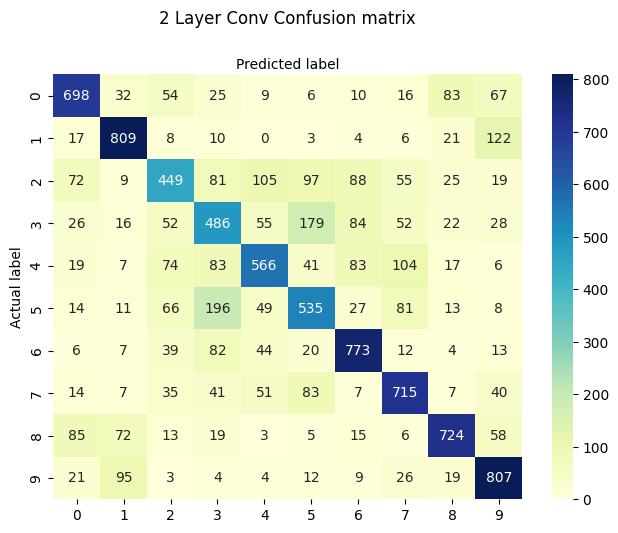

In [6]:
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in train_loader:
    outputs = conv_2layer(imgs)
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print("2 Layer Conv Training Accuracy: %f" % (correct / total))

val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = conv_2layer(imgs)
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
cnf_matrix = confusion_matrix(all_labels, all_preds)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('2 Layer Conv Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("2 Layer Conv Validation:")
print("Accuracy = %f" % (correct / total))
print("Precision =  %f" % (precision))
print("Recall =  %f" % (recall))
print("F1 Score = %f" % (2 * (precision * recall) / (precision + recall)))

3 Layer Conv Network Training Accuracy: 0.694600
3 Layer Conv Network Validation:
Accuracy = 0.662900
Precision =  0.675124
Recall =  0.662900
F1 Score = 0.668956


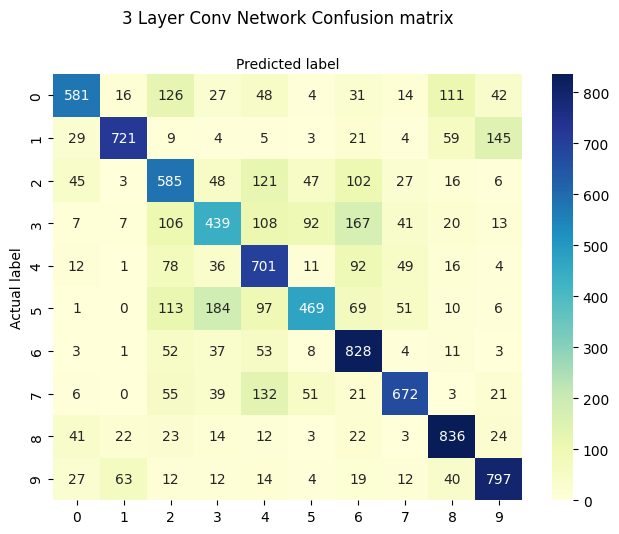

In [7]:
correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in train_loader:
    outputs = conv_3layer(imgs)
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

print("3 Layer Conv Network Training Accuracy: %f" % (correct / total))

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
  for imgs, labels in val_loader:
    outputs = conv_3layer(imgs)
    _, predicted = torch.max(outputs, dim=1)
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

    all_preds.extend(predicted.cpu().numpy())
    all_labels.extend(labels.cpu().numpy())

precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
cnf_matrix = confusion_matrix(all_labels, all_preds)

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('3 Layer Conv Network Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("3 Layer Conv Network Validation:")
print("Accuracy = %f" % (correct / total))
print("Precision =  %f" % (precision))
print("Recall =  %f" % (recall))
print("F1 Score = %f" % (2 * (precision * recall) / (precision + recall)))

In [16]:
total_params1 = sum(p.numel() for p in conv_2layer.parameters() if p.requires_grad)
print(f'Total trainable parameters in net 1: {total_params1}')
total_params2 = sum(p.numel() for p in conv_3layer.parameters() if p.requires_grad)
print(f'Total trainable parameters in net 2: {total_params2}')

Total trainable parameters in net 1: 18354
Total trainable parameters in net 2: 11138
